# 演習問題

In [2]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 9.2 MB/s eta 0:00:01
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=f5582b3b80d9bb3d068753d7abe8524af99e373fba22420429d74935ebb7bc24
  Stored in directory: /home/yumizsui/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

## 1. 基本的な計算

$2^{16}-1$を計算せよ．

In [6]:
2**16-1

65535

## 2. 変数

変数$x = 3, y = 4$を定義して，$x^2 + 2xy + y^2$を計算せよ．

In [7]:
x=3
y=4
x**2+2*x*y+y**2

49

## 3. 実行制御

### 3.1) for文
for文を使って，$s = \displaystyle \prod_{i=1}^{8} 2$を計算せよ．また，この計算結果と同じ結果を得ることができる演算をプログラムで説明せよ．

In [8]:
s = 1
for i in range(8):
    s*=2
print(s)

256


In [9]:
2**8

256

In [10]:
np.prod([2 for i in range(8)])

256

### 3.2) if文

$1$から$40$までの小さい順の整数に関して，$3$の倍数と$3$が付く整数には`aho`と表示し，$5$の倍数には`wan`と表示し，この2つの条件を満たす整数には`aho wan`と表示し，それ以外の整数にはその値を表示するプログラムを記述せよ．以下に出力の例を示す．

```
1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan
```

In [11]:
ans = '1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan'

In [12]:
for i in range(1,41):
    if '3' in str(i) or i % 3 ==0 or i % 5 == 0:
        if '3' in str(i) or i % 3 ==0:
            print('aho', end=' ')
        if i % 5 == 0:
            print('wan', end=' ')
    else:
        print(i, end=' ')

1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan 

In [13]:
# 確認用
myans = '1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan'
ans == myans

True

### 3.3) while文

[二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)を使い，$f(x) = x^2 - 2 = 0$の解を$|f(x)| < 10^{-8}$の精度で求めるプログラムを記述せよ．

In [20]:
def f(x):
    return x**2-2

In [28]:
eps = 1e-8
x1 = 1
x2 = 2
s1=f(x1)>=0
s2=f(x2)>=0
x = (x2+x1)/2
sx= f(x)>=0

while abs(f(x))>eps:
    if(sx==s1):
        x1 = x
    else:
        x2 = x
    x = (x2+x1)/2
    sx= f(x)>=0

## 4. 関数

### 4.1) 関数の定義

2つの引数$x$と$y$を受け取り，$x^2 + y^2$を戻り値とするsquare関数を定義し，$x = 3, y = 4$を引数としてsquare関数を呼び出せ．

In [30]:
def square(x,y):
    return x**2+y**2

In [31]:
square(3,4)

25

### 4.2) 再帰関数

$x$と$y$を非負整数とする．以下の漸化式を再帰関数で実装し，$c_{8,6}$の値を求めよ．
$$
c_{x,y} = \begin{cases}
1 & (x = 0 \vee y = 0) \\
c_{x-1,y} + c_{x,y-1} & (\mbox{それ以外のとき}) \\
\end{cases}
$$

In [32]:
def c(x,y):
    if x==0 or y==0:
        return 1
    return c(x-1,y)+c(x,y-1)

In [34]:
c(8,6)

3003

### 4.3) 関数オブジェクト

方程式$f(x)=0$の解を[二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)で求める関数bisectionを実装せよ．ただし，

+ 第1引数（`func`）は値$x$を引数に受け取り，関数の値$f(x)$を戻り値とする関数オブジェクト
+ 第2引数（`a`）は二分法を行う範囲の下限
+ 第3引数（`b`）は二分法を行う範囲の上限

とせよ．また，このbisection関数を用い，$f(x) = x^2 - 2 = 0$の解を求めよ．

In [35]:
def bisection(func, a, b):
    eps = 1e-8
    sa=func(a)>=0
    sb=func(b)>=0
    x = (b+a)/2
    sx= func(x)>=0
    while abs(func(x))>eps:
        if(sx==sb):
            b = x
        else:
            a = x
        x = (b+a)/2
        sx= func(x)>=0
    return x

In [37]:
print(bisection(f,1,2))
print(bisection(f,-2,-1))

1.4142135605216026
-1.4142135605216026


## 5. リスト

### 5.1) リストへの要素の追加

$A$を$1$以上$20$以下の$2$の倍数を小さい順に並べたリスト，$B$を$1$以上$20$以下の$3$の倍数を小さい順に並べたリストとする．$A$と$B$の両方に含まれる要素を取り出し，空のリスト$C$に追加せよ．ただし，このプログラムではリスト以外のデータ構造（辞書や集合など）を用いないこととせよ．

In [38]:
A=[2*i for i in range(1,11)]
B=[3*i for i in range(1,7)]
print(A)
print(B)
C=[i for i in range(1,21) if i in A and i in B]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[3, 6, 9, 12, 15, 18]


### 5.2) リストの作成
$n = (0, 1, \dots, 16)$に対して$2^n$の値を並べたリストを作成せよ．

In [39]:
[2**i for i in range(17)]

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536]

### 5.3) 2次元配列

$x$と$y$を非負整数とする．以下の漸化式を[動的計画法](https://ja.wikipedia.org/wiki/%E5%8B%95%E7%9A%84%E8%A8%88%E7%94%BB%E6%B3%95)で実装し，$c_{8,6}$の値を求めよ．
$$
c_{x,y} = \begin{cases}
1 & (x = 0 \vee y = 0) \\
c_{x-1,y} + c_{x,y-1} & (\mbox{それ以外のとき}) \\
\end{cases}
$$

In [3]:
mem_c=np.ones([10,10], dtype=int)*-1
def c(x,y):
    if mem_c[x][y]<0:
        if x==0 or y==0:
            mem_c[x][y]=1
        else:
            mem_c[x][y]=c(x-1,y) + c(x,y-1)
    return mem_c[x][y]

## 6. 文字列

### 6.1) 「サスンリダッルパ」

「サスンリダッルパ」という文字列を定義し，その文字列の1,3,5,7文字目を取り出して連結した文字列を得よ．

In [44]:
text = 'サスンリダッルパ'
print(''.join([c for i,c in enumerate(text) if i%2==1]))

スリッパ


### 6.2) 「サンダル」＋「スリッパ」＝「サスンリダッルパ」

「サンダル」＋「スリッパ」の文字を先頭から交互に連結して文字列「サスンリダッルパ」を得よ．

In [45]:
text1 = 'サンダル'
text2 = 'スリッパ'
print(''.join([text1[i]+text2[i] for i in range(4)]))

サスンリダッルパ


### 6.3) フォーマット文字列

身長 (m) を変数`h`で表し，体重 (kg) を変数`w`で表すこととする．体重を身長の二乗で割ったBMI値を求め，身長と体重，BMIの値を「身長=###.#cm, 体重=##.#kg, BMI=##.##」というフォーマットの文字列に変換せよ．ただし，#は数字を表しており，身長と体重は小数点以下1位まで，BMIは小数点以下2位までの表示とせよ．たとえば，`h=1.8`, `w=80`のときは「身長=180.0cm, 体重=80.0kg, BMI=24.69」という文字列を作成したい．

In [46]:
h=1.8
w=80
t=f'身長={100*h:3.1f}cm, 体重={w:2.1f}kg, BMI={w/(h)**2:2.2f}'
print(t)

身長=180.0cm, 体重=80.0kg, BMI=24.69


### 6.4) 文字列の分割

"Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics."という文を単語に分解し，各単語の（アルファベットの）文字数を先頭から出現順に並べたリストを作成せよ．

In [7]:
sentence='Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics.'
s_list=sentence.split(' ')
s_list
print(s_list)
s_len_list=list(map(len, s_list))
print(s_len_list)

['Now', 'I', 'need', 'a', 'drink,', 'alcoholic', 'of', 'course,', 'after', 'the', 'heavy', 'lectures', 'involving', 'quantum', 'mechanics.']
[3, 1, 4, 1, 6, 9, 2, 7, 5, 3, 5, 8, 9, 7, 10]


### 6.5) Typoglycemia

スペースで区切られた単語列に対して，各単語の先頭と末尾の文字は残し，それ以外の文字の順序をランダムに並び替えるプログラムを作成せよ．ただし，長さが４以下の単語は並び替えないこととする．適当な英語の文（例えば"I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind ."）を与え，その実行結果を確認せよ．

In [64]:
import random
def shuffle_statement(statement):
    shuffled_statement=[]
    for word in statement.split(sep=' '):
        if len(word)>4:
            shuffled_statement.append(word[0]+''.join(random.sample(word[1:-1], len(word)-2))+word[-1])
        else:
            shuffled_statement.append(word)
    return ' '.join(shuffled_statement)
statement="I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind ."
print(statement)
shuffled_statement=shuffle_statement(statement)
print(shuffled_statement)

I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind .
I coln'udt bievele that I cluod aatlculy utsaerndnd what I was rdaieng : the ponanmeehl peowr of the hamun mind .


## 7. 辞書

### 7-1) 出現頻度
"neko no ko koneko, shishi no ko kojishi."という文字列から全ての文字（空白や記号を含む）の出現回数を計測せよ．

In [65]:
sentence='neko no ko koneko, shishi no ko kojishi.'
from collections import defaultdict
char_count = defaultdict(int)
for c in sentence:
    char_count[c] += 1
for value in char_count:
    print(f'{value}: {char_count[value]}')

n: 4
e: 2
k: 6
o: 8
 : 7
,: 1
s: 3
h: 3
i: 4
j: 1
.: 1


### 7-2) ユニークなID番号への変換
"neko no ko koneko, shishi no ko kojishi."という文字列からスペース区切りで単語列（記号は単語から除去する）を取り出し，各単語をユニークなID番号の列に変換せよ．このとき，単語をID番号に変換するための辞書と，文字列をID番号列に変換した結果の両方を出力せよ．

In [70]:
sentence='neko no ko koneko, shishi no ko kojishi.'
sentence=sentence.strip('.,')
from collections import defaultdict
word_set = set()
for c in sentence.split(' '):
    word_set.add(c)
word2id={word: id for id, word in enumerate(word_set)}
print(word2id)

for c in sentence.split(' '):
    print(word2id[c], end=' ')

{'kojishi': 0, 'koneko,': 1, 'neko': 2, 'ko': 3, 'no': 4, 'shishi': 5}
2 4 3 1 5 4 3 0 

## 8. ファイルの入出力

### 8.1) ファイルのダウンロード

東京都が公開している[新型コロナウイルス陽性患者のCSVファイル](https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv)をダウンロードせよ．

In [71]:
!wget https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv

--2020-12-06 23:10:26--  https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
CA証明書 '/etc/ssl/certs/ca-certificates.crt' をロードしました
stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp) をDNSに問いあわせています... 2400:6180:0:d1::4df:d001, 2400:6180:0:d1::360:1001, 157.230.43.191, ...
stopcovid19.metro.tokyo.lg.jp (stopcovid19.metro.tokyo.lg.jp)|2400:6180:0:d1::4df:d001|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 3215098 (3.1M) [text/csv]
`130001_tokyo_covid19_patients.csv' に保存中

130001_tokyo_covid1 100%[===================>]   3.07M   330KB/s 時間 9.9s       

2020-12-06 23:10:37 (317 KB/s) - `130001_tokyo_covid19_patients.csv' へ保存完了 [3215098/3215098]



### 8.2) CSVファイルの読み込み 

ダウンロードしたCSVファイルを読み込み，"患者_年代"列で示される年代別の感染者の総数を求めよ．

In [72]:
import pandas as pd
covid_df=pd.read_csv('130001_tokyo_covid19_patients.csv')

In [73]:
covid_df.groupby(['患者_年代']).count()['No']

患者_年代
-             2
100歳以上       13
10代        1791
10歳未満       852
20代       12731
30代        9088
40代        6684
50代        5275
60代        2941
70代        2353
80代        1465
90代         503
不明            6
Name: No, dtype: int64

### 8.3) CSVファイルの書き込み（難易度：高）

ダウンロードしたCSVファイルを読み込み，公表年月日ごとに各年代の感染者数を求め，CSVファイルに保存せよ．なお，余力があればデータが欠損している日付は感染者数が0人として埋めよ．作成されると期待されるファイルの冒頭部分を以下に示す．

```
公表年月日,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,1
```

2020年12月2日現在で作成したファイルを[tokyo-covid.csv](tokyo-covid.csv)として保存してあるので，実行結果の確認用に用いるとよい．

In [81]:
from datetime import datetime as dt
from datetime import timedelta

begin_dt = dt.strptime("2020-01-24", '%Y-%m-%d')
end_dt = dt.strptime("2020-12-06", '%Y-%m-%d')
sum_days = (end_dt - begin_dt).days + 1
datelist = list(map(lambda x, y=begin_dt: (y + timedelta(days=x)).strftime("%Y-%m-%d"), range(sum_days)))

In [82]:
covid_kouhyou_nendai=covid_df.groupby(['公表_年月日','患者_年代'],as_index = False).count().pivot('公表_年月日','患者_年代')['No'].fillna(0).astype('int64')
covid_kouhyou_nendai[:5]

患者_年代,-,100歳以上,10代,10歳未満,20代,30代,40代,50代,60代,70代,80代,90代,不明
公表_年月日,,,,,,,,,,,,,
2020-01-24,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,1,0,0,0,0,0,0,0
2020-02-13,0,0,0,0,0,0,0,0,0,1,0,0,0
2020-02-14,0,0,0,0,0,0,0,1,0,1,0,0,0


In [83]:
nendai_list=['10歳未満','10代','20代','30代','40代','50代','60代','70代','80代','90代','100歳以上','不明','-']
covid_kouhyou_nendai=covid_kouhyou_nendai.reindex(columns=nendai_list)
covid_kouhyou_nendai.index.name='公表年月日'
covid_kouhyou_nendai['合計']=covid_kouhyou_nendai.sum(axis=1)
covid_kouhyou_nendai[:5]

患者_年代,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
公表年月日,,,,,,,,,,,,,,
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-02-13,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2020-02-14,0,0,0,0,0,1,0,1,0,0,0,0,0,2


In [87]:
# データにない曜日を追加
covid_kouhyou_nendai2=pd.DataFrame(index=datelist, columns=nendai_list+['合計']).fillna(0)
covid_kouhyou_nendai2.loc[covid_kouhyou_nendai.index]=covid_kouhyou_nendai
covid_kouhyou_nendai2.index.name='公表年月日'
covid_kouhyou_nendai2[:7]

,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
公表年月日,,,,,,,,,,,,,,
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [88]:
covid_kouhyou_nendai2.to_csv('tokyo-covid-nendaibetsu.csv')

In [89]:
!head tokyo-covid-nendaibetsu.csv

公表年月日,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 9. NumPy

### 9-1) ベクトルの作成

$n = 1, 2, 3, 4, 5$に対して，$1 / n^2$の値を数列として並べよ．

In [118]:
retsu=1/np.arange(1,6)**2
for n,i in enumerate(retsu,1):
    print(f'{n}: {i:.3f}')

1: 1.000
2: 0.250
3: 0.111
4: 0.062
5: 0.040


### 9-2) ベクトルの和

$\sqrt{6 \displaystyle \sum_{n = 1}^{10000} \frac{1}{n^2}}$を計算せよ（[バーゼル問題](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%BC%E3%82%BC%E3%83%AB%E5%95%8F%E9%A1%8C)）．

In [122]:
retsu=1/np.arange(1,10001)**2
np.sqrt(6*retsu.sum())

3.14149716394721

### 9-3) コサイン類似度

2つの位置ベクトル $\boldsymbol{u} = \left(\begin{array}{c}1 & 1 & 1\end{array}\right), \boldsymbol{v} = \left(\begin{array}{c}1 & 2 & 3\end{array}\right)$ のなす角を$\theta$とする．$\cos \theta$の値を求めよ．

In [130]:
u=np.array([1,1,1])
v=np.array([1,2,3])
u.dot(v)/(np.linalg.norm(u) * np.linalg.norm(v))

0.9258200997725515

### 9-4) ベクトルと行列の積

$X = \left(\begin{array}{c}
0 & 0 & 1  \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1 \\
\end{array}\right),
\boldsymbol{w} = \left(\begin{array}{c}
1 & 1 & -1.5
\end{array}\right)^\top$
に対して，$\max(X\boldsymbol{w}, \boldsymbol{0})$を計算せよ．ただし，$\max$は複数のベクトルを引数にとり，各要素ごとの最大値を返すものとする．

In [140]:
X=np.array(
    [[0,0,1],
     [0,1,1],
     [1,0,1],
     [1,1,1]]
    )
w=np.array([1, 1, -1.5])
Xw=X.dot(w)
np.maximum(Xw, np.zeros_like(Xw))

array([0. , 0. , 0. , 0.5])

### 9-5) 行列の多項式（2007年京大文系入試問題）

$A = \left(\begin{array}{c}
2 & 4 \\
-1 & -1 \\
\end{array}\right),
E = \left(\begin{array}{c}
1 & 0 \\
0 & 1 \\
\end{array}\right)$とするとき，$A^6 + 2A^4 + 2A^3 + 2A^2 + 2A + 3E$を求めよ．

In [141]:
A=np.array(
    [[2,4],
     [-1,-1]])
E=np.array(
    [[1,0],
     [0,1]])
A**6+2*A**4+2*A**3+2*A**2+2*A+3*E

array([[ 127, 4776],
       [   1,    4]])

## 10. グラフ

### 10-1) プロット

(1) $\displaystyle \lim_{x \to +0} x^x$を解析的に求め，その計算過程をMarkdownセルにLaTeX形式で記述せよ．

$x^x$について対数をとってその極限を取る．
$$
\begin{align}
    \lim_{x\to+0} \log x^x 
    &= \lim_{x\to+0} x \log x \\
    &= \lim_{x\to+0} \frac{\log x}{\frac{1}{x}} \\
    &= \lim_{x\to+0} \frac{-\infty}{\infty}
\end{align}
$$
より不定形．よってロピタルの定理を用いて，
$$
\begin{align}
    \lim_{x\to+0} \log x^x 
    &= \lim_{x\to+0} \frac{(\log x)'}{(\frac{1}{x})'}\\
    &= \lim_{x\to+0} \frac{\frac{1}{x}}{-\frac{1}{x^2}}\\
    &= \lim_{x\to+0} -x\\
    &= 0
\end{align}
$$
よって，
$$
\begin{align}
    \lim_{x\to+0} x^x 
    &= e^0\\
    &=1
\end{align}
$$

(2) $0 < x \leq 1$の範囲で関数$f(x) = x^x$のグラフを描き，$\displaystyle \lim_{x \to +0} x^x$を図示せよ．ただし，横軸は対数目盛とせよ．

<IPython.core.display.Javascript object>


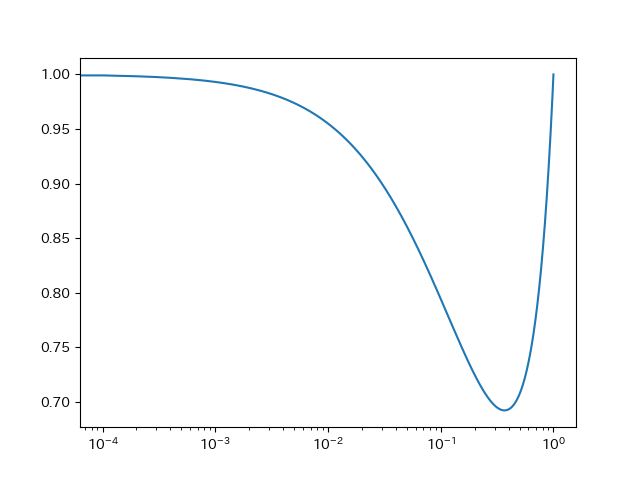

In [195]:
x=np.linspace(0,1,10000)
plt.plot(x,x**x)
plt.xscale('log')
plt.show()

(3) $\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x$を解析的に求め，その計算過程をMarkdownセルにLaTeX形式で記述せよ．

$$
\begin{align}
    \lim_{x \to +0} \left(e^{-1/x^2}\right)^x
    &=\lim_{x \to +0} e^{-1/x}\\
    &=\lim_{x \to +0} e^{-\infty}\\
    &=0
\end{align}
$$

(4) $0 < x \leq 1$の範囲で関数$f(x) = \left(e^{-1/x^2}\right)^x$のグラフを描き，$\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x$を図示せよ．ただし，横軸は対数目盛とせよ．

<IPython.core.display.Javascript object>


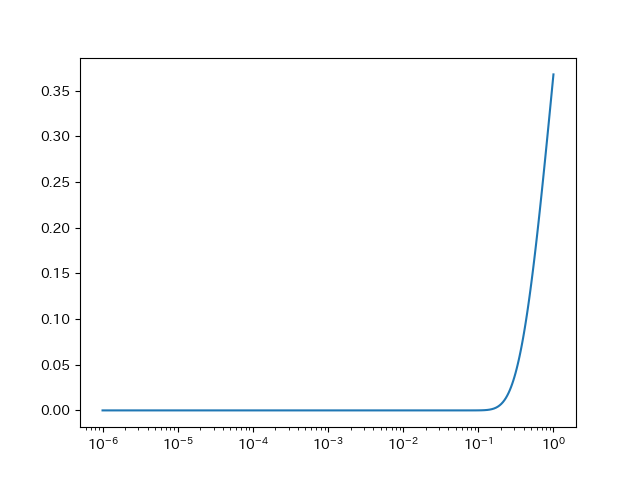

In [194]:
x=np.linspace(1e-6,1,100)
def f(x):
    return (np.exp(-1/x**2))**x
plt.plot(x,f(x))
plt.xscale('log')
plt.show()

### 10-2) グラフ

In [148]:
!wget http://www.chokkan.org/lectures/2020ml/tokyo-covid.csv

--2020-12-07 00:35:09--  http://www.chokkan.org/lectures/2020ml/tokyo-covid.csv
www.chokkan.org (www.chokkan.org) をDNSに問いあわせています... 112.78.112.181
www.chokkan.org (www.chokkan.org)|112.78.112.181|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 13943 (14K) [text/csv]
`tokyo-covid.csv' に保存中

tokyo-covid.csv     100%[===================>]  13.62K  --.-KB/s 時間 0.02s      

2020-12-07 00:35:09 (676 KB/s) - `tokyo-covid.csv' へ保存完了 [13943/13943]



(1) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，年代別の感染者数の推移を折れ線グラフで表示せよ．

In [180]:
df_nendaibetsu=pd.read_csv('tokyo-covid-nendaibetsu.csv',index_col=0, parse_dates=[0])

<IPython.core.display.Javascript object>


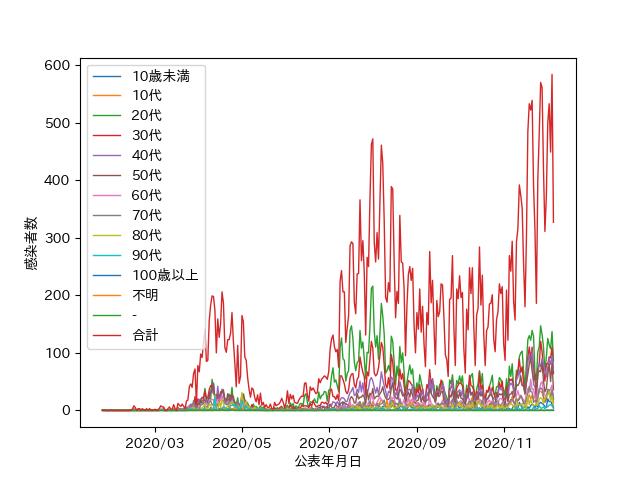

In [197]:
%matplotlib notebook
import matplotlib.dates as dates

ax = plt.subplot()
for column in df_nendaibetsu:
    ax.plot(df_nendaibetsu.index, df_nendaibetsu[column],label=column, linewidth=1)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m'))
ax.set_xlabel('公表年月日')
ax.set_ylabel('感染者数')
plt.legend()
plt.show()

(2) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，１日の感染者数を棒グラフで示せ．

<IPython.core.display.Javascript object>


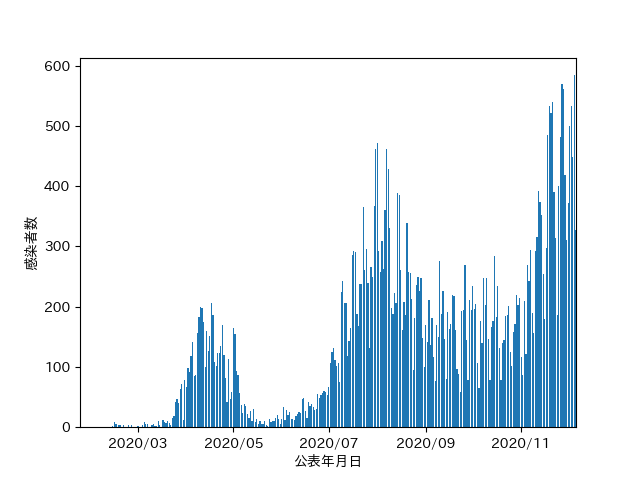

In [203]:
import matplotlib.dates as dates

begin_dt = dt.strptime("2020-01-24", '%Y-%m-%d')
end_dt = dt.strptime("2020-12-06", '%Y-%m-%d')

ax = plt.subplot()
ax.bar(df_nendaibetsu.index, df_nendaibetsu['合計'])
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m'))
ax.set_xlabel('公表年月日')
ax.set_ylabel('感染者数')
ax.set_xlim(begin_dt, end_dt)
plt.show()

(2) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，１日の感染者数を折れ線グラフで示せ．このとき，7日間後方移動平均と14日間後方移動平均も折れ線グラフで示せ．

<IPython.core.display.Javascript object>


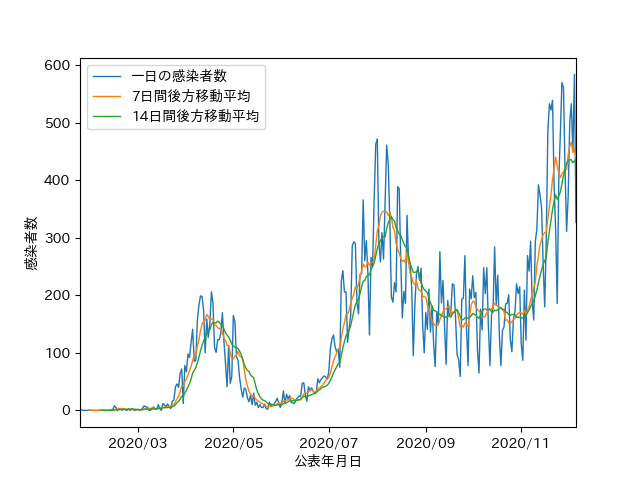

In [221]:
import matplotlib.dates as dates

begin_dt = dt.strptime("2020-01-24", '%Y-%m-%d')
end_dt = dt.strptime("2020-12-06", '%Y-%m-%d')
kansenshasu=df_nendaibetsu['合計']

ax = plt.subplot()

ax.plot(df_nendaibetsu.index, kansenshasu,label='一日の感染者数', linewidth=1)
ax.plot(df_nendaibetsu.index, kansenshasu.rolling(window=7).mean(),label='7日間後方移動平均', linewidth=1)
ax.plot(df_nendaibetsu.index, kansenshasu.rolling(window=14).mean(),label='14日間後方移動平均', linewidth=1)

ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m'))
ax.set_xlabel('公表年月日')
ax.set_ylabel('感染者数')
ax.set_xlim(begin_dt, end_dt)
plt.legend()
plt.show()